<h1>Librerías</h1>

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

<h1>Carga de data</h1>

In [111]:
df = pd.read_csv('train.csv')

<h1>Exploración de la data <h1>

In [112]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [113]:
df.shape

(891, 12)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [115]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<h1>Análisis exploratorio</h1>

<h2>Eliminación de columnas</h2>
<ul>
<li>Se decidió eliminar las columnas identificadoras ya que no aportarán información al modelo, que son Name, Ticket y PassengerID</li>
<li>También se decidió eliminar la columna Cabin ya que contiene más del 50% de valores nulos</li>
</ul>

In [116]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace =True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


<h2>Gráfico de la variable objetivo</h2>

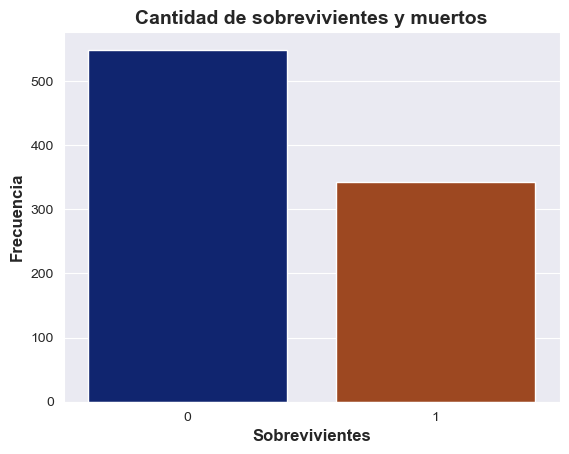

In [117]:
sns.countplot(df,x='Survived',palette='dark')
plt.title('Cantidad de sobrevivientes y muertos',fontsize = 14,fontweight='bold')
plt.xlabel('Sobrevivientes',fontsize = 12,fontweight = 'bold')
plt.ylabel('Frecuencia',fontsize = 12,fontweight = 'bold')
plt.show()

<h2>Análisis univariado</h2>

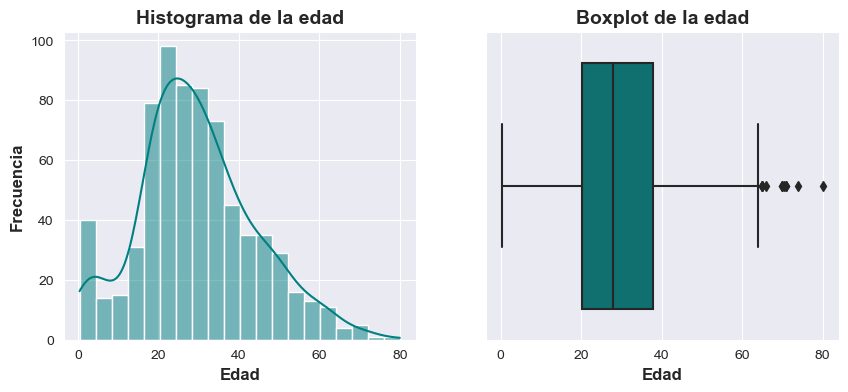

In [118]:
fig,ax = plt.subplots(1,2,figsize=(10,4))

sns.histplot(df,x='Age',kde = True,color='teal',ax=ax[0])
ax[0].set_title('Histograma de la edad',fontsize=14,fontweight='bold')
ax[0].set_xlabel('Edad',fontsize=12,fontweight='bold')
ax[0].set_ylabel('Frecuencia',fontsize=12,fontweight='bold')
sns.boxplot(df,x='Age',ax=ax[1],color = 'teal')
ax[1].set_title('Boxplot de la edad',fontsize = 14,fontweight='bold')
ax[1].set_xlabel('Edad',fontsize=12,fontweight='bold')
plt.show()

<h2>Análisis Bivariado respecto de la variable objetivo<h2>


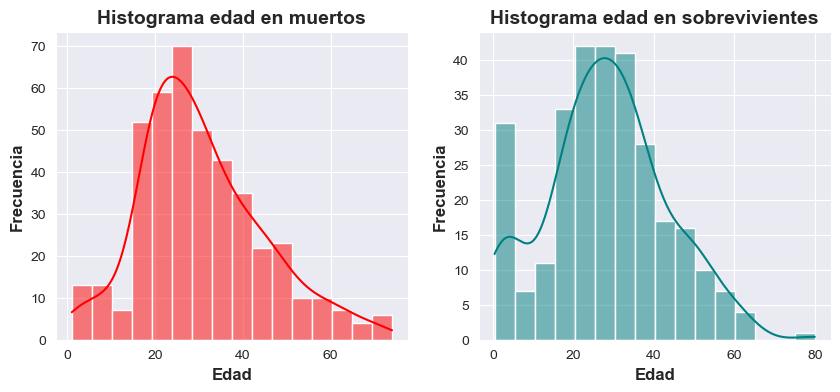

In [119]:
fig,ax = plt.subplots(1,2,figsize=(10,4))
sns.histplot(df[df['Survived']==0],x='Age',kde = True,color='red',ax=ax[0])
ax[0].set_title('Histograma edad en muertos',fontsize=14,fontweight='bold')
ax[0].set_xlabel('Edad',fontsize=12,fontweight='bold')
ax[0].set_ylabel('Frecuencia',fontsize=12,fontweight='bold')
sns.histplot(df[df['Survived']==1],x='Age',kde = True,color='teal',ax=ax[1])
ax[1].set_title('Histograma edad en sobrevivientes',fontsize=14,fontweight='bold')
ax[1].set_xlabel('Edad',fontsize=12,fontweight='bold')
ax[1].set_ylabel('Frecuencia',fontsize=12,fontweight='bold')
plt.show()

<h2>Sexo de los pasajeros</h2>

Text(0, 0.5, 'Frecuencia')

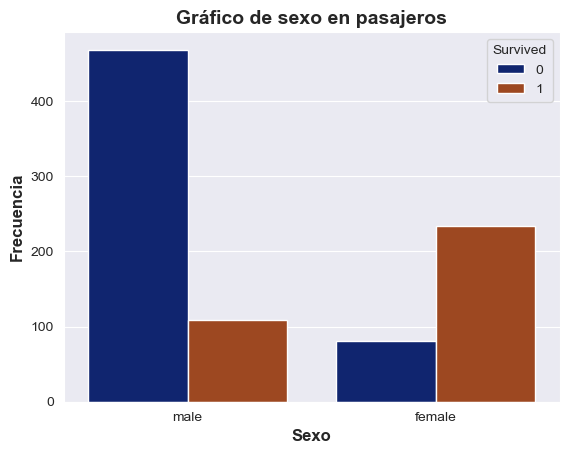

In [120]:
sns.countplot(df,x='Sex',hue='Survived',palette='dark')
plt.title('Gráfico de sexo en pasajeros',fontsize=14,fontweight='bold')
plt.xlabel('Sexo',fontsize=12,fontweight='bold')
plt.ylabel('Frecuencia',fontsize=12,fontweight='bold')

<h2>Clase de los pasajeros</h2>

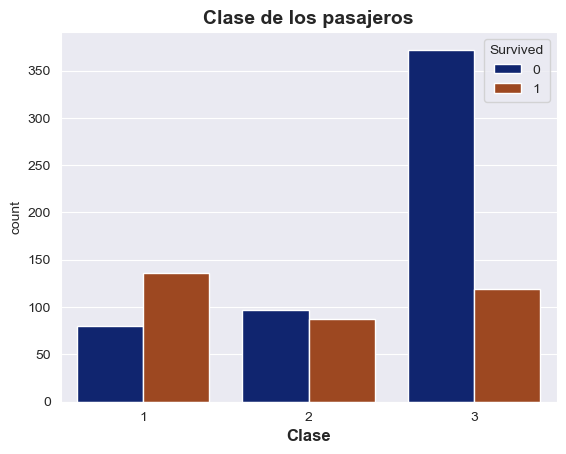

In [121]:
sns.countplot(df,x='Pclass',hue='Survived',palette='dark')
plt.title('Clase de los pasajeros',fontsize=14,fontweight='bold')
plt.xlabel('Clase',fontsize=12,fontweight='bold')
plt.show()

<h2>Gráfico puerto de embarque de los pasajeros</h2>

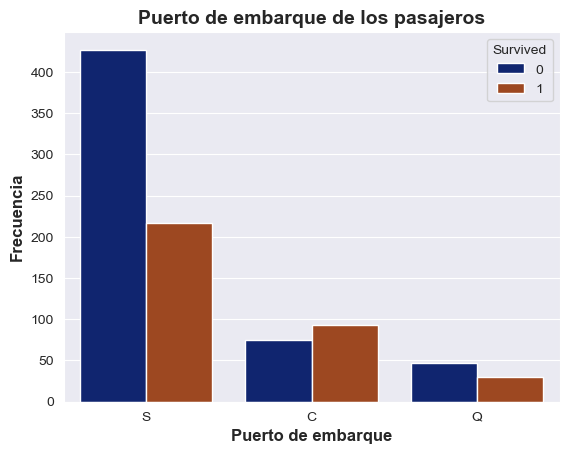

In [122]:
sns.countplot(df,x='Embarked',hue='Survived',palette='dark')
plt.title('Puerto de embarque de los pasajeros',fontsize=14,fontweight='bold')
plt.xlabel('Puerto de embarque',fontsize=12,fontweight='bold')
plt.ylabel('Frecuencia',fontsize=12,fontweight='bold')
plt.show()

<h2>Gráfico para el precio del ticket</h2>

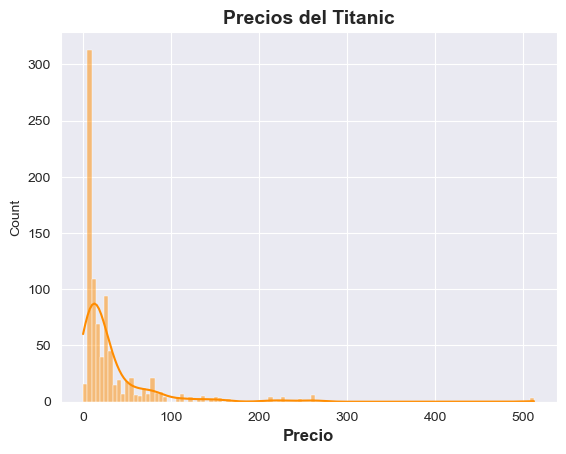

In [123]:
sns.histplot(df,x='Fare',kde=True,color='darkorange')
plt.xlabel('Precio',fontsize=12,fontweight='bold')
plt.title('Precios del Titanic',fontsize=14,fontweight='bold')
plt.show()

In [124]:
df['Fare'].value_counts()

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64

In [125]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

<h2>Construcción de una nueva variable<h2>
Parch y SibSp

In [126]:
df['Familia'] = ((df['SibSp']>0)|(df['Parch']>0)).astype(int)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Familia
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


In [127]:
df.drop(columns = ['SibSp','Parch'],inplace=True)

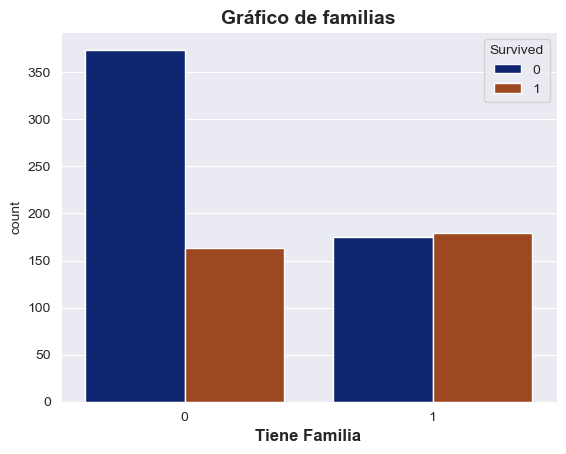

In [128]:
sns.countplot(df,x='Familia',hue='Survived',palette='dark')
plt.title('Gráfico de familias',fontsize=14,fontweight='bold')
plt.xlabel('Tiene Familia',fontsize=12,fontweight='bold')
plt.show()

<h1>Procesamiento de la data</h1>

<h2>Transformación de columnas categóricas en dummies</h2>

In [129]:
df.dropna(subset='Embarked',inplace=True)
df['Pclass'].astype('object')
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Embarked      0
Familia       0
dtype: int64

In [130]:
df2 = pd.get_dummies(df,columns=['Pclass','Sex','Embarked'],drop_first=True)
df2

,Survived,Age,Fare,Familia,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,7.2500,1,False,True,True,False,True
1,1,38.0,71.2833,1,False,False,False,False,False
2,1,26.0,7.9250,0,False,True,False,False,True
3,1,35.0,53.1000,1,False,False,False,False,True
4,0,35.0,8.0500,0,False,True,True,False,True
...,...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,0,True,False,True,False,True
887,1,19.0,30.0000,0,False,False,False,False,True
888,0,NaN,23.4500,1,False,True,False,False,True
889,1,26.0,30.0000,0,False,False,True,False,False


<h2>Imputación de valores nulos para Edad</h2>

In [131]:
df2['Age_is_Nan'] = df2['Age'].isna().astype('int')
mediana_edad = df2['Age'].median(skipna=True)
df2['Age'] = df2['Age'].fillna(mediana_edad)

<h2>Discretización de la variable Precio</h2>

In [132]:
df2['Fare_discretized'] = pd.qcut(df2['Fare'],q=7,labels=False)
df2.drop(columns = 'Fare',inplace=True)

In [133]:
df2.head()

,Survived,Age,Familia,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Age_is_Nan,Fare_discretized
0,0,22.0,1,False,True,True,False,True,0,0
1,1,38.0,1,False,False,False,False,False,0,6
2,1,26.0,0,False,True,False,False,True,0,1
3,1,35.0,1,False,False,False,False,True,0,5
4,0,35.0,0,False,True,True,False,True,0,1


In [135]:
df2[['Pclass_2','Pclass_3','Sex_male','Embarked_Q','Embarked_S']] = df2[['Pclass_2','Pclass_3','Sex_male','Embarked_Q','Embarked_S']].astype('int') 

<h1>Separar en conjunto de entrenamiento y Test</h1>

In [136]:
X = df2.drop(columns = 'Survived')
y = df2['Survived']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

<h2>Estandarización de las variables numéricas</h2>

In [141]:
scaler = StandardScaler()
scaler.fit(X_train[['Age','Fare_discretized']])
X_train[['Age','Fare_discretized']] = scaler.transform(X_train[['Age','Fare_discretized']])
X_test[['Age','Fare_discretized']] = scaler.transform(X_test[['Age','Fare_discretized']])


In [142]:
X_train.head()

,Age,Familia,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Age_is_Nan,Fare_discretized
708,-0.571868,0,0,0,0,0,1,0,1.487840
240,-0.115088,1,0,1,0,0,0,1,0.029401
382,0.189432,0,0,1,1,0,1,0,-0.942891
792,-0.115088,1,0,1,0,0,1,1,1.487840
683,-1.180908,1,0,1,1,0,1,0,1.001694


<h1>Generación de un modelo lineal</h1>